In [35]:
# load packages
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

print(os.getcwd())
print(os.listdir())

/mnt/bioSSD/Demo_Esophagus
['original', '.DS_Store', '._.DS_Store', '.git', '.gitignore', 'SRA', '.ipynb_checkpoints', 'ESC1_post_QC.h5ad', 'ESC1_QC.ipynb', 'ESC2_post_QC.h5ad', 'ESC2_QC.ipynb', 'ESC3_post_QC.h5ad', 'ESC3_QC.ipynb', 'Data_Integration.ipynb', '._Data_Integration.ipynb', '3_sample_major_celltype_annotation.h5ad', 'T_NK_annotation.ipynb', '3_sample_T_NK_secondary_annotation.h5ad', 'Fibroblast_Annotation.ipynb']


In [36]:
# load the data that we annotated before
adata=sc.read_h5ad('3_sample_major_celltype_annotation.h5ad')
print(adata)
print(adata.layers["counts"])
print(adata.obs["celltype"].value_counts())

AnnData object with n_obs × n_vars = 12111 × 15199
    obs: 'sample', 'response', 'n_genes_by_counts', 'total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'n_genes', 'doublet_score', 'predicted_doublet', 'S_score', 'G2M_score', 'phase', 'leiden', 'leiden_str', 'celltype'
    var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'celltype_colors', 'hvg', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'sample_colors', 'umap'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'
<Compressed Sparse Row sparse matrix of dtype 'float32'
	with 22095072 stored elements and shape (12111, 15199)>
  Coords	Values
  (0, 4)	1.0
  (0, 8)	4.0
  (0, 9)	23.0
  (0, 16)	1.0
  (0, 23)	2.

In [37]:
# We extract fibroblasts, the current hotspot in tumor micro environment for further analysis.
#adata_fibro = adata[adata.obs["celltype"].isin(["Fibroblast", "Pericyte","Endothelium"])]
adata_fibro=adata[(adata.obs["celltype"]=="Fibroblast")]
print(adata_fibro)
adata_fibro.X=adata_fibro.layers["counts"].copy()
print(adata_fibro.X)

View of AnnData object with n_obs × n_vars = 1335 × 15199
    obs: 'sample', 'response', 'n_genes_by_counts', 'total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'n_genes', 'doublet_score', 'predicted_doublet', 'S_score', 'G2M_score', 'phase', 'leiden', 'leiden_str', 'celltype'
    var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'celltype_colors', 'hvg', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'sample_colors', 'umap'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]]


/home/flynn/miniconda3/envs/Visium_HD_10x/lib/python3.11/site-packages/anndata/_core/anndata.py:618: FutureWarning: You are attempting to set `X` to a matrix on a view which has non-unique indices. The resulting `adata.X` will likely not equal the value to which you set it. To avoid this potential issue, please make a copy of the data first. In the future, this operation will throw an error.
  warnings.warn(msg, FutureWarning, stacklevel=1)
/tmp/ipykernel_212542/1107427621.py:5: UserWarning: Trying to set a dense array with a sparse array on a view.Densifying the sparse array.This may incur excessive memory usage
  adata_fibro.X=adata_fibro.layers["counts"].copy()
/tmp/ipykernel_212542/1107427621.py:5: ImplicitModificationWarning: Modifying `X` on a view results in data being overridden
  adata_fibro.X=adata_fibro.layers["counts"].copy()


/home/flynn/miniconda3/envs/Visium_HD_10x/lib/python3.11/site-packages/scanpy/preprocessing/_normalization.py:269: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


AnnData object with n_obs × n_vars = 1335 × 15199
    obs: 'sample', 'response', 'n_genes_by_counts', 'total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'n_genes', 'doublet_score', 'predicted_doublet', 'S_score', 'G2M_score', 'phase', 'leiden', 'leiden_str', 'celltype'
    var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'celltype_colors', 'hvg', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'sample_colors', 'umap'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'


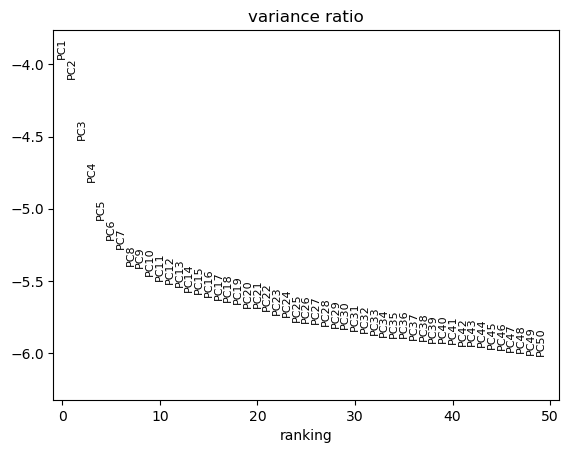

2025-11-13 12:46:23,888 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2025-11-13 12:46:23,962 - harmonypy - INFO - sklearn.KMeans initialization complete.
2025-11-13 12:46:23,963 - harmonypy - INFO - Iteration 1 of 10
2025-11-13 12:46:24,022 - harmonypy - INFO - Iteration 2 of 10
2025-11-13 12:46:24,076 - harmonypy - INFO - Converged after 2 iterations


AnnData object with n_obs × n_vars = 1335 × 15199
    obs: 'sample', 'response', 'n_genes_by_counts', 'total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'n_genes', 'doublet_score', 'predicted_doublet', 'S_score', 'G2M_score', 'phase', 'leiden', 'leiden_str', 'celltype'
    var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'celltype_colors', 'hvg', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'sample_colors', 'umap'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'


In [38]:
# In order to get accurate results, we need to perform dimentionality reduction and clustering again
# As mentioned before, this data is seriously affected by the batch effect,
# which needs to be processed again since we're using the count matrix.
sc.pp.normalize_total(adata_fibro,target_sum=np.median(adata_fibro.obs["total_counts"]))
sc.pp.log1p(adata_fibro)
sc.pp.highly_variable_genes(adata_fibro,n_top_genes=3000,subset=False)
print(adata_fibro)
# We perform regression and data scaling again as well.
s_genes = [
    "MCM5", "PCNA", "TYMS", "FEN1", "MCM2", "MCM4", "RRM1",
    "UNG", "GINS2", "MCM6", "CDCA7", "DTL", "PRIM1", "UHRF1",
    "HELLS", "RFC2", "RPA2", "NASP", "RAD51AP1", "GMNN", "WDR76",
    "SLBP", "CCNE2", "UBR7", "POLD3", "MSH2", "ATAD2", "RAD51",
    "RRM2", "CDC45", "CDC6", "EXO1", "TIPIN", "DSCC1", "BLM",
    "CASP8AP2", "USP1", "CLSPN", "POLA1", "CHAF1B", "BRIP1", "E2F8"
]
g2m_genes = [
    "HMGB2", "CDK1", "NUSAP1", "UBE2C", "BIRC5", "TPX2", "TOP2A", "NDC80",
    "CKS2", "NUF2", "CKS1B", "MKI67", "TMPO", "CENPF", "TACC3", "SMC4",
    "CCNB2", "CKAP2L", "CKAP2", "AURKB", "BUB1", "KIF11", "ANP32E", "TUBB4B",
    "GTSE1", "KIF20B", "HJURP", "CDCA3", "CDC20", "TTK", "CDC25C", "KIF2C",
    "RANGAP1", "NCAPD2", "DLGAP5", "CDCA2", "CDCA8", "ECT2", "KIF23", "HMMR",
    "AURKA", "PSRC1", "ANLN", "LBR", "CKAP5", "CENPE", "CTCF", "NEK2",
    "G2E3", "GAS2L3", "CBX5", "CENPA"
]
sc.tl.score_genes_cell_cycle(adata_fibro, s_genes=s_genes, g2m_genes=g2m_genes)
sc.pp.regress_out(adata_fibro,['pct_counts_ribo','S_score', 'G2M_score'])
# Now we can perform data scaling with confidence
sc.pp.scale(adata_fibro,max_value=10)
sc.tl.pca(adata_fibro)
sc.pl.pca_variance_ratio(adata_fibro,log=True,n_pcs=50)
# In this case, we choose the first 8 PCs
sc.external.pp.harmony_integrate(adata_fibro,key="sample")
print(adata_fibro)

In [39]:
# Now we perform further dimentionality reduction and 
# unsupervised clustering based on harmony-corrected PCs
sc.pp.neighbors(adata_fibro,n_pcs=8,use_rep="X_pca_harmony")
sc.tl.umap(adata_fibro)

leiden
0    407
3    309
1    228
2    166
4    122
5     58
6     45
Name: count, dtype: int64


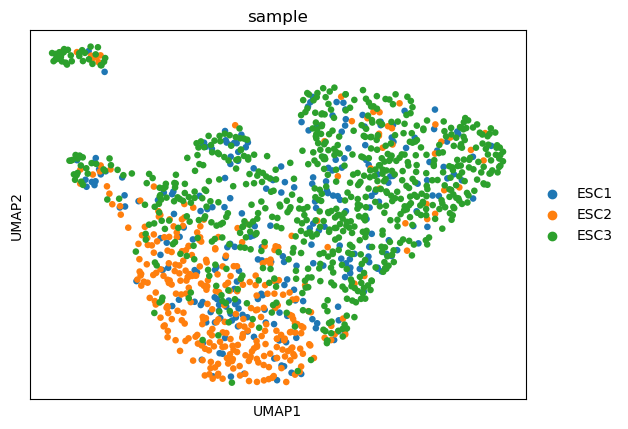

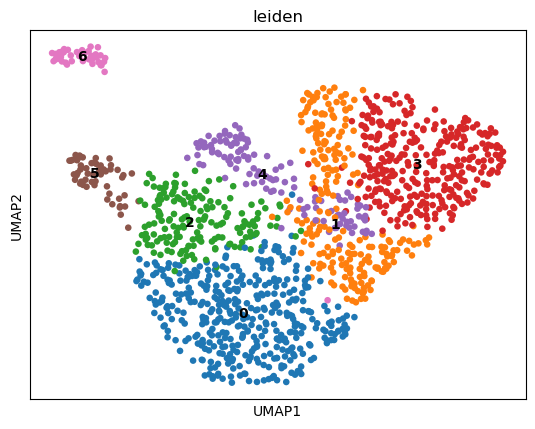

In [43]:
# We add a special cell for unsupervised clustering alone
# because this step is repeated many times until an ideal result is obtained
sc.tl.leiden(adata_fibro,resolution=0.4,flavor="igraph",n_iterations=2)
print(adata_fibro.obs["leiden"].value_counts())
sc.pl.umap(adata_fibro, color=["sample"])
sc.pl.umap(adata_fibro, color=["leiden"],legend_loc="on data")

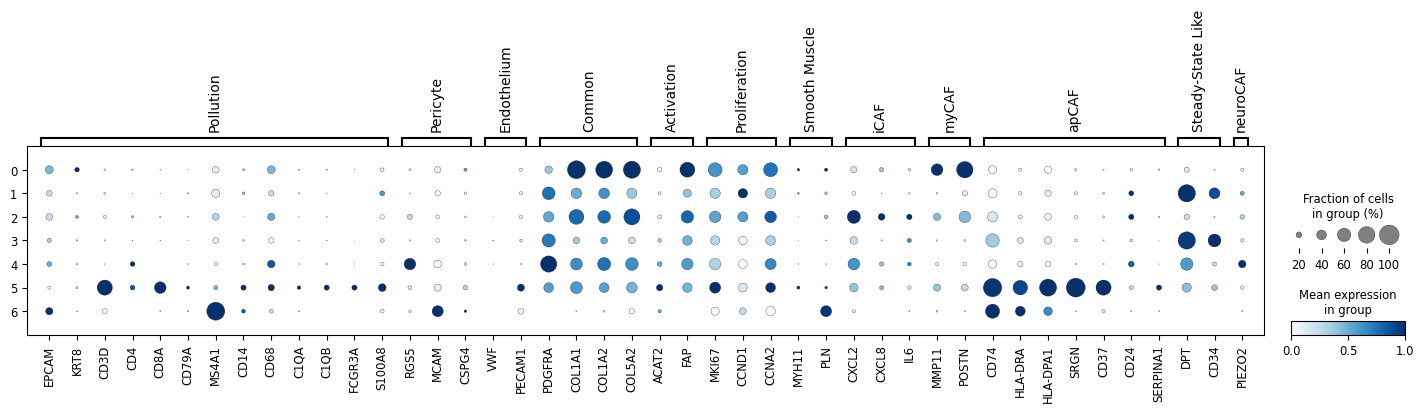

In [51]:
# Now we perform cell-type annotation based on marker genes
# We draw a dotplot for clear visulization
marker_genes = {
    "Pollution":["EPCAM","KRT8",
             "CD3D","CD4","CD8A",
             "CD79A","MS4A1",
             "CD14","CD68","C1QA","C1QB","FCGR3A","S100A8"],
    "Pericyte":["RGS5","MCAM","CSPG4"],
    "Endothelium":["VWF","PECAM1"],
    "Common": ["PDGFRA","COL1A1","COL1A2","COL5A2"],
    "Activation": ["ACAT2","FAP"],
    "Proliferation":["MKI67","CCND1","CCNA2"],
    "Smooth Muscle":["MYH11","PLN"],
    "iCAF":["CXCL2","CXCL8","IL6"],
    "myCAF":["MMP11","POSTN"],
    "apCAF":["CD74","HLA-DRA","HLA-DPA1","SRGN",
             "CD37","CD24","SERPINA1"], #"C1Q"
    "Steady-State Like":["DPT","CD34"],
    "neuroCAF":["PIEZO2"]} #"DGL2"

sc.pl.dotplot(adata_fibro, 
              marker_genes,
              groupby="leiden", 
              standard_scale="var",
              cmap='Blues'
             )

In [47]:
# Now we perform celltype annotation 
cluster_ids = sorted(adata_fibro.obs['leiden'].unique().tolist())
cluster_ids = [str(c) for c in cluster_ids]  # 转成字符串

# We create a dataframe first
celltype = pd.DataFrame({
    'ClusterID': cluster_ids,
    'celltype': ['Unknown'] * len(cluster_ids)
})

# We put in celltype information here
celltype.loc[celltype['ClusterID'].isin(['0']), 'celltype'] = 'myCAF'
celltype.loc[celltype['ClusterID'].isin(['1']), 'celltype'] = 'sslCAF'
celltype.loc[celltype['ClusterID'].isin(['2']), 'celltype'] = 'iCAF'
celltype.loc[celltype['ClusterID'].isin(['3']), 'celltype'] = 'sslCAF'
celltype.loc[celltype['ClusterID'].isin(['4','5','6']), 'celltype'] = 'Pollution'

# Now we map the information back
adata_fibro.obs['leiden_str'] = adata_fibro.obs['leiden'].astype(str) # safety check
mapping = dict(zip(celltype['ClusterID'], celltype['celltype']))
adata_fibro.obs['celltype_secondary'] = adata_fibro.obs['leiden_str'].map(mapping)

print(adata_fibro.obs['celltype_secondary'].value_counts())

celltype_secondary
sslCAF       537
myCAF        407
Pollution    225
iCAF         166
Name: count, dtype: int64


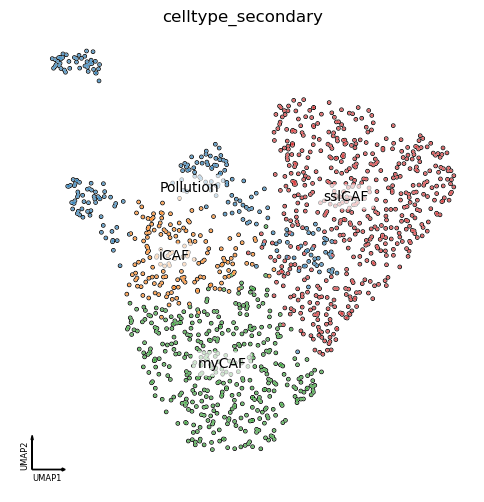

In [48]:
# Finally, we introduce a customized function to draw beautiful UMAP plot
from sklearn.neighbors import KernelDensity

def enhance_umap(adata, color='celltype', figsize=(6,6)):
    fig, ax = plt.subplots(figsize=figsize)
    sc.pl.umap(
        adata,
        color=color,
        legend_loc=None,
        frameon=False,
        size=15,
        ax=ax,
        add_outline=True,
        show=False
    )

    for cell_type in adata.obs[color].unique():
        mask = adata.obs[color] == cell_type
        x = adata.obsm["X_umap"][mask, 0]
        y = adata.obsm["X_umap"][mask, 1]

        x_min, x_max = x.min() - 0.5, x.max() + 0.5
        y_min, y_max = y.min() - 0.5, y.max() + 0.5
        xx, yy = np.mgrid[x_min:x_max:100j, y_min:y_max:100j]

        xy_train = np.vstack([x, y]).T
        xy_test = np.vstack([xx.ravel(), yy.ravel()]).T

        kde = KernelDensity(bandwidth=0.5, metric='euclidean')
        kde.fit(xy_train)

        Z = np.exp(kde.score_samples(xy_test))
        Z = Z.reshape(xx.shape)

    cell_type_counts = adata.obs[color].value_counts(normalize=True) * 100
    for cell_type, percentage in cell_type_counts.items():
        mask = adata.obs[color] == cell_type
        x = np.median(adata.obsm["X_umap"][mask, 0])
        y = np.median(adata.obsm["X_umap"][mask, 1])
        ax.text(
            x, y, f"{cell_type}",
            fontsize=10, 
            ha="center", 
            color="black",
            bbox=dict(
                facecolor='white',         
                edgecolor='none', 
                alpha=0.65,
                boxstyle="round,pad=0.4"  
            )  
        )
    ax = plt.gca()
    ax.set_xlabel('UMAP1', fontsize=6)
    ax.set_ylabel('UMAP2', fontsize=6)
 
    x_min, x_max = ax.get_xlim()
    y_min, y_max = ax.get_ylim()

    x_range = x_max - x_min
    y_range = y_max - y_min
    aspect_ratio = (fig.get_size_inches()[0] / fig.get_size_inches()[1]) * (y_range / x_range)  # 校正宽高比

    dx = x_range * 0.1 * aspect_ratio
    dy = y_range * 0.1 * aspect_ratio  

    head_width = dy * 0.1
    head_length = dx * 0.1

    ax.arrow(
        x_min, y_min,
        dx, 0,
        head_width=head_width,
        head_length=head_length,
        fc='black',
        ec='black'
    )

    ax.arrow(
        x_min, y_min,
        0, dy,
        head_width=head_width,
        head_length=head_length,
        fc='black',
        ec='black'
    )

    label_offset = dx * 0.1
    ax.text(
        x_min + dx/2, 
        y_min - label_offset,  
        'UMAP1',
        ha='center', 
        va='top', 
        fontsize=6
    )
    ax.text(
        x_min - label_offset, 
        y_min + dy/2,
        'UMAP2',
        rotation=90,
        ha='right', 
        va='center',
        fontsize=6
    )

enhance_umap(adata_fibro, color='celltype_secondary', figsize=(6,6))

In [49]:
# Don't forget to save the data
adata.write_h5ad("3_sample_Fibroblast_secondary_annotation.h5ad",compression="gzip")